# Laboratorio 2 Regresión Lineal Multiple
Estudiante: Sheila Rojas Vasquez
Materia: SIS 420

In [3]:

import os
import numpy as np
import pandas as pd
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


#Análisis de datos
Primeramente se realizará una análisis de los datos de tal forma que se visualice la relación entre las variables y el target (Precio de una casa), además se encontrarán los coeficientes de correlación reconocer las relaciones lineales más predominantes

In [101]:
data1=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/machine learning/datasets/housing.csv')

In [102]:
data1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [103]:
data1 = data1.drop(data1.columns[-1], axis=1)
data1 = data1.drop(data1.columns[5], axis=1)
print(data1)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       households  median_income  median_house_valu

In [104]:
#correlacion de las variables
data1.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.979728,-0.007723,0.049686
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,0.065843,0.688075,1.000000


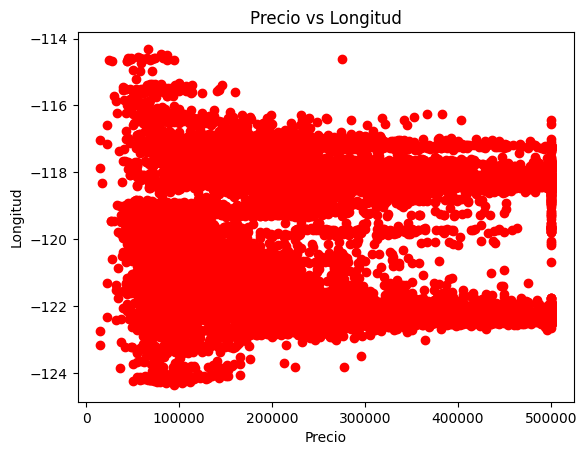

In [105]:
plt.plot(data1["median_house_value"],data1["longitude"],"ro")
plt.title("Precio vs Longitud")
plt.ylabel("Longitud")
plt.xlabel("Precio")
plt.show()

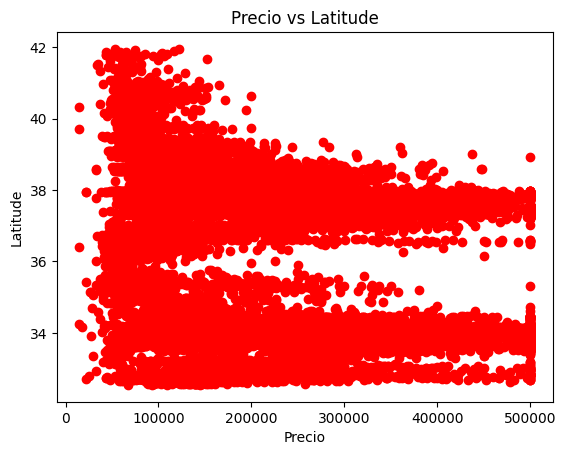

In [106]:
plt.plot(data1["median_house_value"],data1["latitude"],"ro")
plt.title("Precio vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Precio")
plt.show()

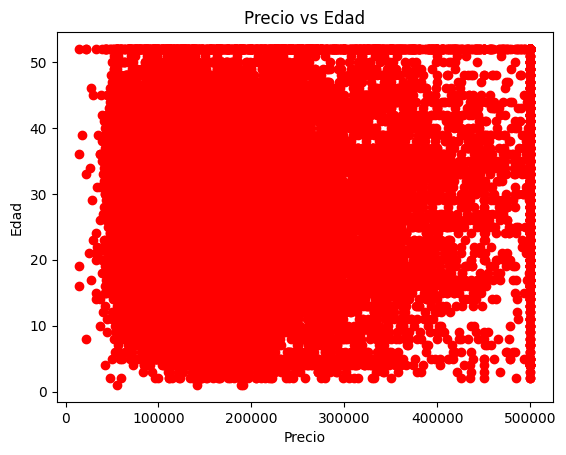

In [27]:
plt.plot(data1["median_house_value"],data1["housing_median_age"],"ro")
plt.title("Precio vs Edad")
plt.ylabel("Edad")
plt.xlabel("Precio")
plt.show()

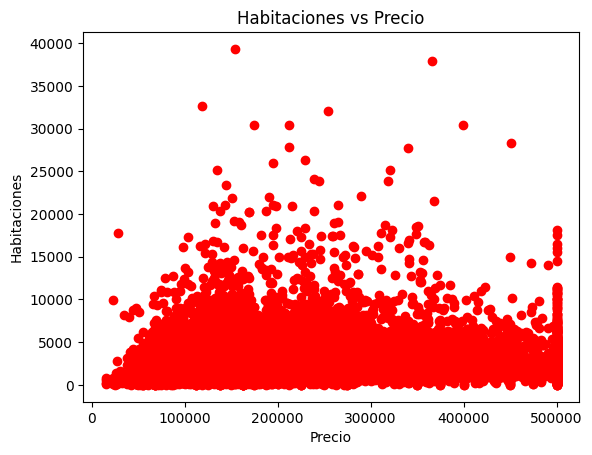

In [28]:
plt.plot(data1["median_house_value"],data1["total_rooms"],"ro")
plt.title("Habitaciones vs Precio")
plt.ylabel("Habitaciones")
plt.xlabel("Precio")
plt.show()

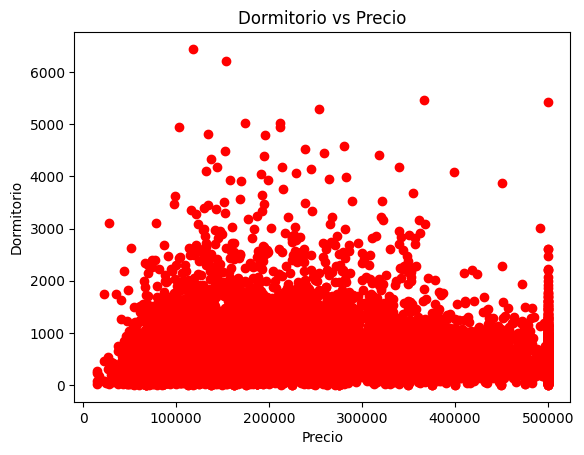

In [29]:
plt.plot(data1["median_house_value"],data1["total_bedrooms"],"ro")
plt.title("Dormitorio vs Precio")
plt.ylabel("Dormitorio")
plt.xlabel("Precio")
plt.show()

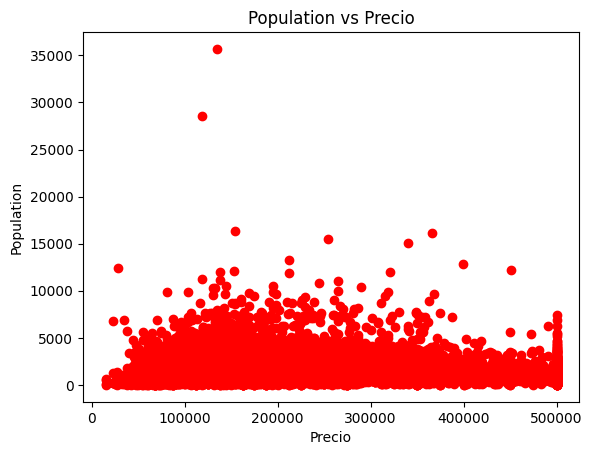

In [32]:
plt.plot(data1["median_house_value"],data1["population"],"ro")
plt.title("Population vs Precio")
plt.ylabel("Population")
plt.xlabel("Precio")
plt.show()

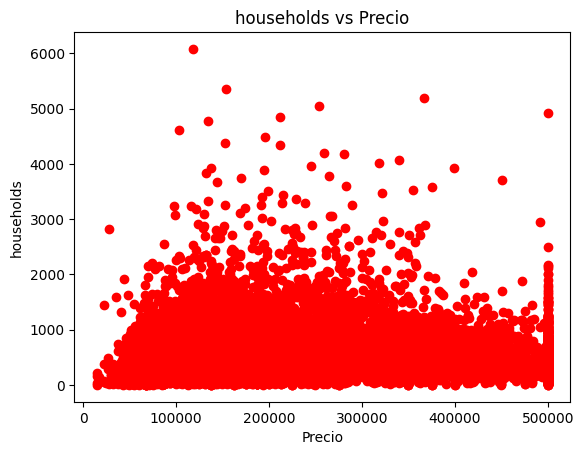

In [31]:
plt.plot(data1["median_house_value"],data1["households"],"ro")
plt.title("households vs Precio")
plt.ylabel("households")
plt.xlabel("Precio")
plt.show()

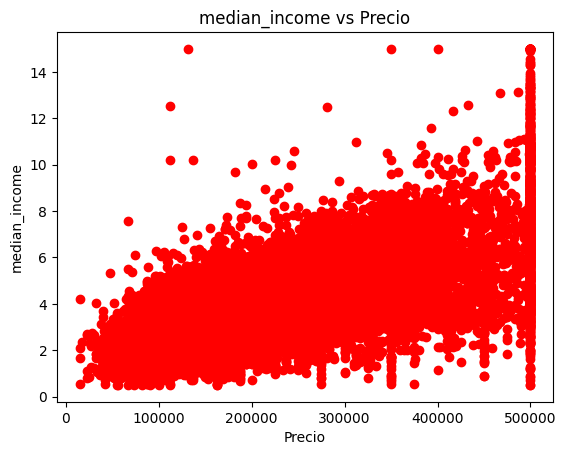

In [33]:
plt.plot(data1["median_house_value"],data1["median_income"],"ro")
plt.title("median_income vs Precio")
plt.ylabel("median_income")
plt.xlabel("Precio")
plt.show()

# REGRESIÓN LINEAL MULTIVARIABLE




In [108]:

data = np.genfromtxt('/content/gdrive/MyDrive/Colab Notebooks/machine learning/datasets/housing.csv', delimiter=',')


X = data[1:, :4]
y = data[1:, 8]
m = y.size
print(m)
print(X[1])
print(y[1])


20640
[-122.22   37.86   21.   7099.  ]
358500.0


In [109]:
def  featureNormalize(X):
    X_norm = X.copy() #Evita el direccionamiento no se admite con X_norm=X
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [110]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[-122.23   37.88   41.    880.  ]
 [-122.22   37.86   21.   7099.  ]
 [-122.24   37.85   52.   1467.  ]
 ...
 [-121.22   39.43   17.   2254.  ]
 [-121.32   39.43   18.   1860.  ]
 [-121.24   39.37   16.   2785.  ]]
Media calculada: [-119.56970446   35.63186143   28.63948643 2635.7630814 ]
Desviación estandar calculada: [2.00348319e+00 2.13590065e+00 1.25852527e+01 2.18156240e+03]
[[-1.32783522  1.05254828  0.98214266 -0.8048191 ]
 [-1.32284391  1.04318455 -0.60701891  2.0458901 ]
 [-1.33282653  1.03850269  1.85618152 -0.53574589]
 ...
 [-0.8237132   1.77823747 -0.92485123 -0.17499526]
 [-0.87362627  1.77823747 -0.84539315 -0.35559977]
 [-0.83369581  1.75014627 -1.00430931  0.06840827]]


Despues de `featureNormalize` la funcion es probada, se añade el temino de interseccion a `X_norm`:

In [111]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [112]:
print(X)

[[ 1.         -1.32783522  1.05254828  0.98214266 -0.8048191 ]
 [ 1.         -1.32284391  1.04318455 -0.60701891  2.0458901 ]
 [ 1.         -1.33282653  1.03850269  1.85618152 -0.53574589]
 ...
 [ 1.         -0.8237132   1.77823747 -0.92485123 -0.17499526]
 [ 1.         -0.87362627  1.77823747 -0.84539315 -0.35559977]
 [ 1.         -0.83369581  1.75014627 -1.00430931  0.06840827]]


In [113]:
print(X[5])

[ 1.         -1.33781784  1.03850269  1.85618152 -0.786942  ]


In [114]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [115]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente

    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

#### 3.2.1 Seleccionando coheficientes de aprendizaje


theta calculado por el descenso por el gradiente: [ 206855.8169087  -140540.93515425 -145983.75092439    5249.69597109
   18370.4937467 ]


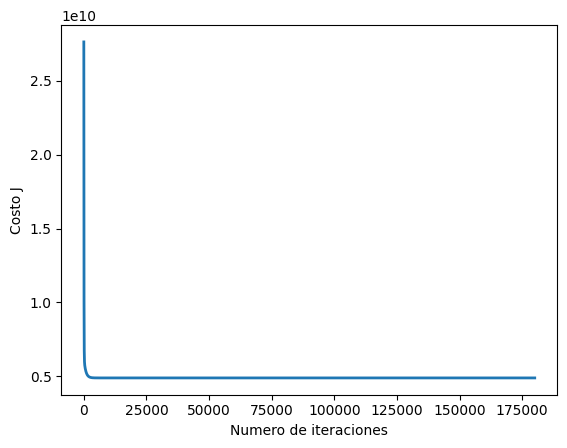

In [117]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.01 # alpha = 0.003
num_iters = 180000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(5)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# # Estimar el precio para una casa de 1650 sq-ft, con 3 dormitorios
# X_array = [1, 1650, 3]
# X_array[1:3] = (X_array[1:3] - mu) / sigma #nprmalizacion de datos
# price = np.dot(X_array, theta)   # Se debe cambiar esto

# print('El precio predecido para una casa de 1650 sq-ft y 3 dormitorios (usando el descenso por el gradiente): ${:.0f}'.format(price))

In [118]:
theta

array([ 206855.8169087 , -140540.93515425, -145983.75092439,
          5249.69597109,   18370.4937467 ])

In [121]:
data1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,349.0,1.8672,84700.0


In [122]:
X_array = [1, -122.25, 37.85,52,1274]
X_array[1:5] = (X_array[1:5] - mu) / sigma
price = np.dot(X_array, theta)

In [124]:
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El precio predecido para una casa de longitud -122.25 y latitud 37.85, de 52 años y 1274 habitaciones (usando el descenso por el gradiente): ${:.0f}'.format(price))

El precio predecido para una casa de longitud -122.25 y latitud 37.85, de 52 años y 1274 habitaciones (usando el descenso por el gradiente): $241547


In [130]:
#100 predicciones
import numpy as np


X_array = np.array([1, -122.25, 37.85, 52, 1274])

precios = []
caracteristicas=[]
for _ in range(100):
    variacion = np.random.normal(0, 0.05, 4)
    X_temp = X_array.copy()
    X_temp[1:5] = X_temp[1:5] * (1 + variacion)
    caracteristicas.append(X_temp[1:5].copy())
    X_temp[1:5] = (X_temp[1:5] - mu) / sigma
    price = np.dot(X_temp, theta)
    precios.append(price)

df = pd.DataFrame(caracteristicas, columns=["Longitud", "Latitud", "Años de la casa", "Número de habitaciones"])
df['Precio'] = precios

# Imprimir la tabla
print(df)

      Longitud    Latitud  Años de la casa  Número de habitaciones  \
0  -117.219476  41.475988        50.191471             1344.263129   
1  -117.977416  34.659334        49.770071             1359.215006   
2  -122.482098  40.050036        51.181425             1257.568566   
3  -118.039690  36.585840        56.653844             1233.370766   
4  -120.353265  35.062658        55.056380             1287.629441   
..         ...        ...              ...                     ...   
95 -123.914591  38.022914        53.627597             1265.564421   
96 -127.616763  37.737577        56.243296             1241.018661   
97 -113.069089  39.198563        54.055563             1214.043489   
98 -123.220526  35.491144        52.486251             1207.979496   
99 -118.558719  37.962412        48.727091             1320.543665   

           Precio  
0  -359326.422922  
1   159694.087994  
2   106980.881608  
3    34202.075441  
4   300391.918088  
..            ...  
95  347104.541680  

#Ecuación de la normal

In [131]:
# Cargar datos
data = np.genfromtxt('/content/gdrive/MyDrive/Colab Notebooks/machine learning/datasets/housing.csv', delimiter=',')
X = data[1:, :4]
y = data[1:, 8]
m = y.size
print(m)

X = np.concatenate([np.ones((m, 1)), X], axis=1)

20640


In [132]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [134]:
theta = normalEqn(X, y);
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));


Theta calculado a partir de la ecuación de la normal: [-5.77954371e+06 -7.01482977e+04 -6.83476316e+04  4.17130755e+02
  8.42079683e+00]


#Regresión polinomica

In [142]:
data = np.genfromtxt('/content/gdrive/MyDrive/Colab Notebooks/machine learning/datasets/housing.csv', delimiter=',')
X = data[:, 7]
y = data[:, 8]
m = y.size
X_original = X.copy()
#X = np.concatenate([X, X**1/2], axis=1)
X = np.concatenate([X.reshape(-1, 1), (X**0.5).reshape(-1, 1)], axis=1)
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [143]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [148]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);


In [149]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'ro', ms=10, mec='k')
    pyplot.ylabel('Edad personas')
    pyplot.xlabel('Capacidad adquisitiva 1,000s')


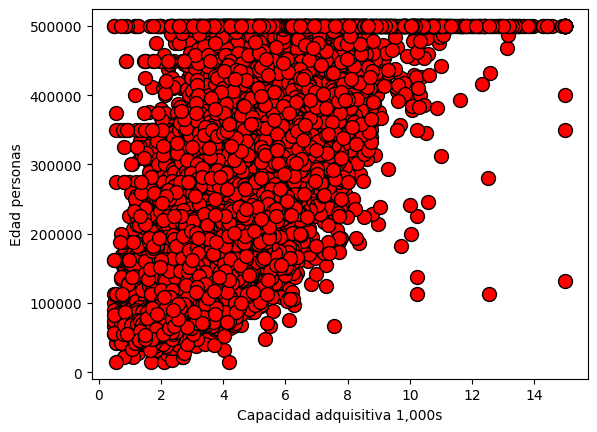

In [150]:
plotData(X[:, 1], y)
#X = np.concatenate([np.ones((m, 1)), X], axis=1)
#X = np.concatenate([X, X * X], axis=1)

pyplot.plot(X[:, 1], np.dot(X, theta), '-')